# Prise en main de pandas, numpy et matplotlib

Ce notbook est une introduction à trois libraries python facilitant l'analyse de données. 

- matplotlib : permet de faire des graphiques
- numpy : permet de faciliter le travail avec des matrices et des vecteurs
- pandas : offre la possibilité de manipuler des tableaux de données plus complexe (DataFrame)

Nous nous servirons d'un jeu de données sur le nombre de naissances par prénoms, départements et années pour illustrer l'usage de ces bibliothèques en essayant au passage d'explorer ces données.

Commençons par charger ces trois librairies et définir le mode d'affichage des figures de notre notebook avec l'instruction jupyter '%matplotlib inline'.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lecture du jeu de données et information contextuelles

Nous pouvons charger les données avec pandas. La fonction 'read_csv' permet de charger les données nous psécifions juste le séparateur de chhamps en l'occurence ' '. Nous pouvons afficher les noms et lzq type des colonnes de ce tableau de données ainsi que ça taille.

In [2]:
prenoms = pd.read_csv("./prenoms.csv",sep=" ")
print(prenoms.dtypes)
print("Nombre de lignes : {l}, nombre de colonnes : {c}".format(l=prenoms.shape[0],c=prenoms.shape[1]))

name    object
n        int64
sex     object
year     int64
dep     object
dtype: object
Nombre de lignes : 1824800, nombre de colonnes : 5


Nous pouvons également afficher quelques ligne du jeu de données avec la mèthode head.

In [3]:
prenoms.head()

,name,n,sex,year,dep
0,aadil,3,M,1983,vaucluse
1,aaliyah,8,F,2001,dom-tom
2,aaliyah,4,F,2001,hauts-de-seine
3,aaliyah,3,F,2002,bouches-du-rhone
4,aaliyah,10,F,2002,dom-tom


L'objet 'prenoms' est en effet une [DataFrame pandas](http://pandas.pydata.org/pandas-docs/version/0.23/dsintro.html#dataframe) qui dispose de nombreuse méthodes facilitant la manipulation de données. 

In [4]:
prenoms.__class__

pandas.core.frame.DataFrame

# Accéder à des valeures : loc, iloc...

Une des première chose que nous pouvons faire, c'est accéder à des sous-ensemble de ce jeu de données, sélectionner quelques lignes et colonnnes. 

In [5]:
# accès par position
prenoms.iloc[125,:]

name    aaron
n           4
sex         M
year     2004
dep      oise
Name: 125, dtype: object

In [6]:
# accès par index (nom)
prenoms.loc[:5,'sex':'year']

,sex,year
0,M,1983
1,F,2001
2,F,2001
3,F,2002
4,F,2002
5,F,2002


In [7]:
# selection booleenne
prenoms[prenoms.sex=="M"].head()

,name,n,sex,year,dep
0,aadil,3,M,1983,vaucluse
32,aaron,3,M,1962,paris
33,aaron,3,M,1985,paris
34,aaron,3,M,1989,paris
35,aaron,4,M,1990,paris


In [8]:
# abreviation
prenoms['sex'].head()

0    M
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [9]:
# abreviation
prenoms.sex.head()

0    M
1    F
2    F
3    F
4    F
Name: sex, dtype: object

Chaque colonnes d'une Data.Frame est une [Serie pandas](https://pandas.pydata.org/pandas-docs/version/0.23.4/api.html#series). Les séries sont des vecteurs unidimensionels avec un index. Elles disposent elles aussi de méthode utiles. 

In [10]:
prenoms.sex.__class__

pandas.core.series.Series

Nous pouvons par exemple utiliser la méthode 'unique' pour récupérer la liste des départements de notre jeu de données.

In [11]:
prenoms.dep.unique()

array(['vaucluse', 'dom-tom', 'hauts-de-seine', 'bouches-du-rhone',
       'seine-saint-denis', 'var', 'essonne', 'haute-savoie', 'rhone',
       'val-de-marne', 'val-doise', 'paris', 'seine-et-marne', 'nord',
       'bas-rhin', 'finistere', 'seine-maritime', 'alpes-maritimes',
       'aude', 'gironde', 'haute-garonne', 'herault', 'cher', 'oise',
       'loire-atlantique', 'haut-rhin', 'aisne', 'allier', 'ardennes',
       'aveyron', 'calvados', 'cote-dor', 'doubs', 'ille-et-vilaine',
       'loire', 'moselle', 'nievre', 'orne', 'pas-de-calais',
       'pyrenees-orientales', 'ain', 'haute-vienne', 'indre-et-loire',
       'isere', 'marne', 'morbihan', 'saone-et-loire', 'sarthe', 'savoie',
       'somme', 'tarn', 'vienne', 'yvelines', 'ardeche', 'aube',
       'charente-maritimes', 'cotes-darmor', 'eure', 'eure-et-loire',
       'hautes-pyrenees', 'loir-et-cher', 'loiret', 'lot-et-garonne',
       'maine-et-loire', 'mayenne', 'meurthe-et-moselle', 'puy-de-dome',
       'pyrenees-atlanti

# Questions :
- Filtrer les données pour trouver le nombre de paul nait à paris en 1983 ? Vous pourer utiliser une sélection booleene avec plusieurs clauses (Attention au paratenthèses et aux opérateurs utiliser '&') ?
- Combien de naissances sont enregistrées dans ce jeu de données (vous pourrez regarder la méthode ['sum'](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html) ) ?
- Combien de naissances sont enregistrées à paris en 1990 ?
- Dans quel département y a t'il eu le plus de nathalie en 1983 (vous pourrez regarder la méthode ['sort_values'](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) )?


Dans une série, nous pouvons axcéder aux valeurs (stockée dans un tableau numpy) et à l'index associé.

In [16]:
prenoms[(prenoms.name=="paul") & (prenoms.year==1983) & (prenoms.dep=="paris")]

,name,n,sex,year,dep
1447235,paul,78,M,1983,paris


In [22]:
prenoms.loc[(prenoms.dep=="paris") & (prenoms.year==1990),["n"]].sum()

n    35025
dtype: int64

In [47]:
prenoms[(prenoms.year==1983) & (prenoms.name=="nathalie")].sort_values("n",ascending=False)

,name,n,sex,year,dep
1365497,nathalie,173,F,1983,nord
1365500,nathalie,169,F,1983,paris
1365474,nathalie,130,F,1983,hauts-de-seine
1365505,nathalie,127,F,1983,rhone
1365455,nathalie,126,F,1983,dom-tom
...,...,...,...,...,...
1365493,nathalie,9,F,1983,meuse
1365453,nathalie,8,F,1983,creuse
1365464,nathalie,7,F,1983,gers
1365487,nathalie,7,F,1983,lozere


In [13]:
prenoms.dep.index

RangeIndex(start=0, stop=1824800, step=1)

Il peut être intéressant d'avoir accès à ce stockage et utiliser les possibilitée offertes par [numpy](https://docs.scipy.org/doc/numpy/reference/arrays.html). Cela peut par exemple nous permettre de cacluler nous même le coefficiant d'asymétrie d'une distrubution ou [skewness  en anglais ](https://fr.wikipedia.org/wiki/Asym%C3%A9trie_(statistiques)) dont la formule est la suivante :

$$skew =  \frac{\sum_{i=1}^N \frac{(x_i-\bar{x})^3}{N}}{s^3}$$

avec $\bar{x}$ la moyenne et $s$ l'écart type.

In [14]:
n = prenoms.n.values

In [15]:
moyenne = np.mean(n)
ecart_type = np.sqrt(np.mean(np.power(n-moyenne,2)))
L=len(n)

In [16]:
s3  = np.sum(np.power(n-moyenne,3))/L
s3n = s3/ecart_type**3 
s3n

19.927669208657708

Nous pouvons vérifier notre résultat en comparant avec celui de la fonction skew de la librairie stats de scipy :

In [17]:
from scipy.stats import skew
skew(n)

19.92766920865771

## Gestion des index

Revenons un peu a pandas et parlons des indexes qui optimisent l'accès et sont également utilisés pour les jointure, ils peuvent être multiples. Lors de la lecture du fichier un index par défaut à été construit avec un simple numéro de ligne. Il est possible de redéfinir nous même nos index avec la méthode 'set_index' et en supprimer avec la méthode 'reset_index'.

In [18]:
prenoms_index = prenoms.set_index(['name', 'sex', 'year','dep'])
prenoms_index.head(10)

n
name    sex year dep                  
aadil   M   1983 vaucluse            3
aaliyah F   2001 dom-tom             8
                 hauts-de-seine      4
            2002 bouches-du-rhone    3
                 dom-tom            10
                 seine-saint-denis   7
                 var                 3
            2003 essonne             3
                 haute-savoie        3
                 hauts-de-seine      3

### Accès à un élément via l'index
pour en savoir + sur les multi-index
https://pandas.pydata.org/pandas-docs/version/0.23.4/advanced.html#advanced

In [31]:
prenoms.loc[('etienne',"M",1981,"indre-et-loire"),]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['etienne', 'M', 'indre-et-loire'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

## Résumé statistique
Vous pouvez avoir rapidement une description statistique des colonnes numériques d'une DataFrame avec la méthode describe. Qui donne, les information statistiques élémentaires, moyenne, écart type, quartille,...

In [20]:
prenoms.describe()

,n,year
count,1.824800e+06,1.824800e+06
mean,2.366039e+01,1.979801e+03
std,6.160872e+01,1.742404e+01
min,3.000000e+00,1.946000e+03
25%,4.000000e+00,1.966000e+03
50%,8.000000e+00,1.982000e+03
75%,2.100000e+01,1.995000e+03
max,6.657000e+03,2.006000e+03


## Aggrégation (group_by)
Vous pouvez facilement faire des opérations de groupage avec la méthode 'group_by' celle-ci est utilisée ici pour calculer le nombre de naissance de chaque prénoms grâce a une simple somme.

In [51]:
prenoms_total = prenoms[["name","n"]].groupby("name").sum().sort_values("n",ascending=False)
prenoms_total

,n
name,
jean,720116
marie,699197
philippe,494299
michel,469548
alain,428194
...,...
koraline,3
koraly,3
korantin,3


Mais vous pouvez fournir une autre opération d'aggrégation, utiliser plusieurs colonnes pour l'aggrégation et enchainer les groupements. La ligne suivante calcul par exemple  pour chaque prénoms et années le nombre de naissance total et à partir de ce résultat le nombre de naissance maximal observée en 1 année :

In [52]:
prenoms[["name","year","n"]].groupby(["name","year"]).sum().reset_index().groupby("name").agg(np.max).sort_values("n",ascending=False)

,year,n
name,,
jean,2006,56047
marie,2006,32857
michel,2006,31927
nathalie,2006,29512
sylvie,2006,27544
...,...,...
isalyne,2006,3
priscila,1984,3
isahora,2002,3


# Questions :

- Quel département à eu le moins de naissance sur la période ?
- Quel prénoms à été le plus donnée en 1983 ?

In [53]:
prenoms[["n","dep"]].groupby("dep").sum().sort_values("n")

,n
dep,
lozere,38988
alpes-de-haute-provence,54619
hautes-alpes,66278
creuse,66752
ariege,69217
...,...
bouches-du-rhone,1172896
pas-de-calais,1313116
dom-tom,1592715


In [54]:
prenoms[prenoms.year==1983][["name","n"]].groupby("name").sum().sort_values("n",ascending=False).head(1)

,n
name,
julien,16102


## Analyse des prénoms par année
Nous allons étudier un peu les courbes de popularité des prénoms de ce jeu de données entre 1946 et 2006 En nous focalisant sur les prénoms fréquents. Pour ce faire nous allons tracer la somme cumulée du pourcentage de naissances suivant le rang des prénoms. La DataFrame prenoms_total est déja triée en ordre décroissant, nous pouvons donc simplement cumulés ces comptage et divisée par le nombre de naissance de manière à n ous ramener à un pourcentage :

In [55]:
cdf = prenoms_total.n.cumsum()/prenoms_total.n.sum()*100
cdf.head()

name
jean        1.667882
marie       3.287312
philippe    4.432172
michel      5.519706
alain       6.511459
Name: n, dtype: float64

Les jeans représentent plus de 1,5 % des naissance dans ce jeu de données et les 5 prénoms les plus courant couvrent 6,5 % des naissances.  

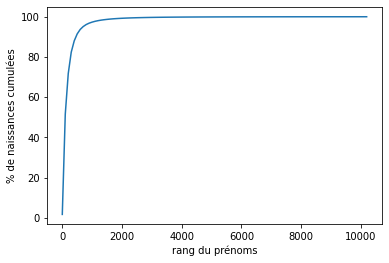

In [56]:
f  = plt.plot(range(0,len(cdf),100),cdf.values[range(0,len(cdf),100)])
xl = plt.xlabel("rang du prénoms")
yl = plt.ylabel("% de naissances cumulées")

Autrement dit, si nous ne conservons que les 1000 prénoms les plus courants, nous couvrirons plus de 97 % des naissances.

In [57]:
cdf[999]

97.32301797367144

Nous allons donc nous focaliser sur ces prénoms et observer l'évolution de leur popularité.

In [58]:
# récupérations de la litse des 1000 prénoms les + utilisés
liste_prenoms_courants = prenoms_total.index.values[:1000]

# filtrage des données pour ne conserver que les prénoms courants utilisations de la méthode 'isin'
prenoms_freq = prenoms[prenoms.name.isin(liste_prenoms_courants)]

# création des série temporelle nombre de naissance par année
prenoms_annees = prenoms_freq[["name","year","n"]].groupby(["name","year"]).sum()
prenoms_annees.head()


n
name  year    
abdel 1948   4
      1950   3
      1951   7
      1952   8
      1953  14

Nous pouvons maintenant observer l'évolution temporelle de la popularité de ces prénoms. regardons par exemple les courbes des josettes, antonio et emma :

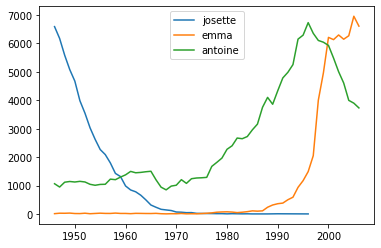

In [59]:
fig, ax = plt.subplots()
listeprenoms = ["josette", "emma","antoine"]
for p in listeprenoms:
    nbnaiss = prenoms_annees.reset_index("year").loc[p]
    fj  = ax.plot(nbnaiss.year,nbnaiss.n,label=p)

leg = ax.legend()

## Passage en format large et complétion des données manquantes avec des 0
Méthode unstack et fillna.
Nous allons faire un k-means sur ces données pour voir si nous trouvons des groupe de prénoms.
Pour cela nous allons passer les données en format large avec une colonne par année et une ligne par prénoms en utilisant la méthode 'unstack'.

In [60]:
prenoms_annees_large=prenoms_annees.unstack().fillna(0)["n"]
prenoms_annees_large

year,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
name,,,,,,,,,,,,,,,,,,,,,
abdel,0.0,0.0,4.0,0.0,3.0,7.0,8.0,14.0,19.0,22.0,...,29.0,18.0,31.0,33.0,12.0,28.0,31.0,21.0,28.0,33.0
abdelkader,0.0,0.0,5.0,0.0,5.0,9.0,3.0,19.0,35.0,43.0,...,48.0,55.0,20.0,59.0,23.0,48.0,50.0,61.0,45.0,48.0
adam,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,435.0,553.0,625.0,777.0,812.0,1017.0,1223.0,1516.0,1846.0,2284.0
adel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,223.0,327.0,210.0,235.0,127.0,139.0,154.0,175.0,166.0,184.0
adelaide,20.0,12.0,17.0,22.0,18.0,16.0,14.0,22.0,0.0,11.0,...,125.0,94.0,72.0,102.0,48.0,42.0,59.0,37.0,57.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yvon,1226.0,1236.0,1330.0,1169.0,1249.0,1246.0,1186.0,997.0,1101.0,1004.0,...,0.0,0.0,0.0,6.0,5.0,0.0,0.0,3.0,0.0,7.0
yvonne,1603.0,1213.0,1229.0,1102.0,937.0,864.0,668.0,634.0,564.0,396.0,...,7.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
zakaria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,145.0,179.0,182.0,186.0,158.0,228.0,373.0,260.0,311.0,242.0


In [61]:
years = prenoms_annees_large.columns.values
years

array([1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006])

# Normalisation des profils par la somme

Nouas allons normaliser les courbes de prénoms par leurs valeur maximale de manière a supprimer l'effet taille ~ prénoms populaire porénoms plus rare.

In [62]:
prenoms_annees_norm=prenoms_annees_large.div(prenoms_annees_large.max(axis=1), axis=0)
prenoms_annees_norm

year,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
name,,,,,,,,,,,,,,,,,,,,,
abdel,0.000000,0.000000,0.059701,0.000000,0.044776,0.104478,0.119403,0.208955,0.283582,0.328358,...,0.432836,0.268657,0.462687,0.492537,0.179104,0.417910,0.462687,0.313433,0.417910,0.492537
abdelkader,0.000000,0.000000,0.016722,0.000000,0.016722,0.030100,0.010033,0.063545,0.117057,0.143813,...,0.160535,0.183946,0.066890,0.197324,0.076923,0.160535,0.167224,0.204013,0.150502,0.160535
adam,0.000000,0.000000,0.000000,0.000000,0.000000,0.002627,0.000000,0.000000,0.000000,0.000000,...,0.190455,0.242119,0.273643,0.340193,0.355517,0.445271,0.535464,0.663748,0.808231,1.000000
adel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.681957,1.000000,0.642202,0.718654,0.388379,0.425076,0.470948,0.535168,0.507645,0.562691
adelaide,0.057971,0.034783,0.049275,0.063768,0.052174,0.046377,0.040580,0.063768,0.000000,0.031884,...,0.362319,0.272464,0.208696,0.295652,0.139130,0.121739,0.171014,0.107246,0.165217,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yvon,0.921805,0.929323,1.000000,0.878947,0.939098,0.936842,0.891729,0.749624,0.827820,0.754887,...,0.000000,0.000000,0.000000,0.004511,0.003759,0.000000,0.000000,0.002256,0.000000,0.005263
yvonne,1.000000,0.756706,0.766687,0.687461,0.584529,0.538989,0.416719,0.395508,0.351840,0.247037,...,0.004367,0.000000,0.001871,0.000000,0.000000,0.000000,0.000000,0.000000,0.003743,0.000000
zakaria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.388740,0.479893,0.487936,0.498660,0.423592,0.611260,1.000000,0.697051,0.833780,0.648794


# K-means

Nous allons dans cette section essayé de trouver des clusters de prénoms ayant des courbes de popularités similaires

In [63]:
from sklearn import metrics
from sklearn.cluster import KMeans

n_samples, n_features = prenoms_annees_norm.shape
print("n_features: %d, \t n_samples %d"
      % (n_features,n_samples))

n_features: 61, 	 n_samples 1000


## Clustering du jeu de données avec k-means
visualisation des centres de chaque cluster

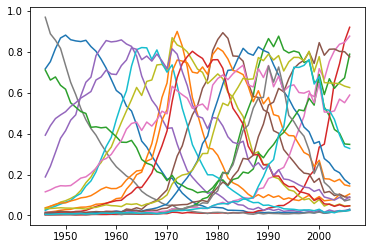

In [64]:
# visualisation des profils 
alg=KMeans(init='k-means++', n_clusters=20, n_init=10)
alg.fit(prenoms_annees_norm)
# plot simple avec matplotlib
plt.plot(years,alg.cluster_centers_.T)
plt.show()

# Question 2 :
Faire une figure avec l'ensemble des courbes du cluster 5 ainsi que la courbe moyenne de ce cluster

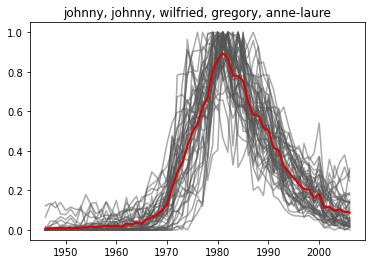

In [65]:
k = 5
fig, ax = plt.subplots()
for prenom,serie in prenoms_annees_norm.loc[alg.labels_==k,:].iterrows():
    ax.plot(years,serie,color="#555555",alpha=0.5)
m  = ax.plot(years,alg.cluster_centers_[k,:],color="#dd0000", linewidth=2)
ti = plt.title(', '.join(np.random.choice(prenoms_annees_norm.index.values[alg.labels_==k],5)))

# Question 3 :
Quel prénoms a la courbe la plus proche (distance euclidienne) de nathalie ?
Vous pourrez vous servir des fonctions np.mean, np.sum, np.power et de la méthode apply.

In [66]:
def dist(a,b):
    return np.sum(np.power(a-b,2))

In [70]:
dist(prenoms_annees_norm.iloc[5,:],prenoms_annees_norm.iloc[7,:])

6.062603243350816

In [85]:
dists = prenoms_annees_norm.apply(lambda x: dist(x,prenoms_annees_norm.loc["nathalie"]),1)

In [ ]:
dists.

## Analyse par département et années

Création d'une carte animé des prénoms masculin les plus données par département et par année

In [54]:
# extraction des prénoms masculin les plus données
prenoms_annees_dep=prenoms_freq.loc[prenoms_freq.sex=="M",].sort_values("n", ascending=False).groupby(["year","dep"])



In [55]:
prenoms1_annees_dep = prenoms_annees_dep.agg(lambda v: v.iloc[0])

In [56]:
prenoms1_annees_dep

name     n sex
year dep                                       
1946 ain                         jean   381   M
     aisne                       jean   899   M
     allier                      jean   656   M
     alpes-de-haute-provence     jean    60   M
     alpes-maritimes             jean   277   M
     ardeche                     jean   299   M
     ardennes                    jean   290   M
     ariege                      jean   195   M
     aube                        jean   244   M
     aude                        jean   350   M
     aveyron                     jean   319   M
     bas-rhin                    jean   961   M
     bouches-du-rhone            jean  1335   M
     calvados                  michel   482   M
     cantal                      jean   328   M
     charente                    jean   283   M
     charente-maritimes          jean   469   M
     cher                        jean   328   M
     correze                     jean   501   M
     corse                       jean   218   M
     cote-dor                    jean   322   M
     cotes-darmor                jean   957   M
     creuse                      jean   249   M
     deux-sevres                 jean   555   M
     dom-tom                     jean   733   M
     dordogne                    jean   265   M
     doubs                     michel   283   M
     drome                       jean   322   M
     eure                      michel   351   M
     eure-et-loire               jean   547   M
...                               ...   ...  ..
2006 moselle                     enzo   141   M
     nievre                    mathis    35   M
     nord                        enzo   451   M
     oise                        enzo   120   M
     orne                        enzo    53   M
     paris                    raphael   333   M
     pas-de-calais               enzo   303   M
     puy-de-dome                 enzo    87   M
     pyrenees-atlantiques        enzo    77   M
     pyrenees-orientales         enzo    68   M
     rhone                      lucas   201   M
     saone-et-loire              enzo    68   M
     sarthe                      enzo    89   M
     savoie                      enzo    60   M
     seine-et-marne              enzo   169   M
     seine-maritime              enzo   267   M
     seine-saint-denis        mohamed   217   M
     somme                      lucas    99   M
     tarn                      mathis    54   M
     tarn-et-garonne             enzo    31   M
     territoire-de-belfort       enzo    30   M
     val-de-marne                enzo   142   M
     val-doise                   enzo   192   M
     var                         enzo    94   M
     vaucluse                  mathis    69   M
     vendee                      enzo    74   M
     vienne                      enzo    70   M
     vosges                      enzo    70   M
     yonne                       enzo    48   M
     yvelines                    enzo   157   M

[5686 rows x 3 columns]

# lecture des coordonées des centres des départements

In [57]:
dep=pd.read_csv("./departements_centroid.csv",sep=",")
dep.head(5)

,lat,long,dep
0,5.348637,46.099732,ain
1,3.559524,49.560927,aisne
2,3.187521,46.393597,allier
3,6.244769,44.106145,alpes-de-haute-provence
4,6.265436,44.664003,hautes-alpes


# Gestion des problème de jointure sur les noms de départements entre les deux tableaux

In [59]:
cdf=prenoms1_annees_dep.loc[1946].reset_index()
dep[~dep.dep.isin(cdf.dep)]

,lat,long,dep
16,-0.650225,45.772651,charente-maritime
19,4.772734,47.426104,cote-d'or
20,-2.864315,48.440467,cotes-d'armor
26,1.370080,48.388048,eure-et-loir
28,8.987466,41.863988,corse-du-sud
29,9.206532,42.394695,haute-corse
91,2.243424,48.522598,essonne
92,2.245858,48.847669,hauts-de-seine
93,2.478408,48.917532,seine-saint-denis
94,2.469188,48.777376,val-de-marne


In [60]:
cdf[~cdf.dep.isin(dep.dep)]

,dep,name,n,sex
16,charente-maritimes,jean,469,M
19,corse,jean,218,M
20,cote-dor,jean,322,M
21,cotes-darmor,jean,957,M
24,dom-tom,jean,733,M
29,eure-et-loire,jean,547,M


In [61]:
dep.loc[dep.dep=="charente-maritime","dep"]="charente-maritimes"
dep.loc[dep.dep=="corse-du-sud","dep"]="corse"
dep.loc[dep.dep=="cote-d'or","dep"]="cote-dor"
dep.loc[dep.dep=="cotes-d'armor","dep"]="cotes-darmor"
dep.loc[dep.dep=="eure-et-loir","dep"]="eure-et-loire"
dep=pd.concat([dep,pd.DataFrame({"lat":[-3],"long":[41],"dep":"dom-tom"},index=[101])])
cdf[~cdf.dep.isin(dep.dep)]

,dep,name,n,sex


In [62]:
cdf=pd.merge(cdf,dep)
cdf

,dep,name,n,sex,lat,long
0,ain,jean,381,M,5.348637,46.099732
1,aisne,jean,899,M,3.559524,49.560927
2,allier,jean,656,M,3.187521,46.393597
3,alpes-de-haute-provence,jean,60,M,6.244769,44.106145
4,alpes-maritimes,jean,277,M,7.116711,43.938009
5,ardeche,jean,299,M,4.425567,44.752773
6,ardennes,jean,290,M,4.640532,49.616309
7,ariege,jean,195,M,1.503777,42.921100
8,aube,jean,244,M,4.161529,48.304616
9,aude,jean,350,M,2.414022,43.103251


# jointure et figure

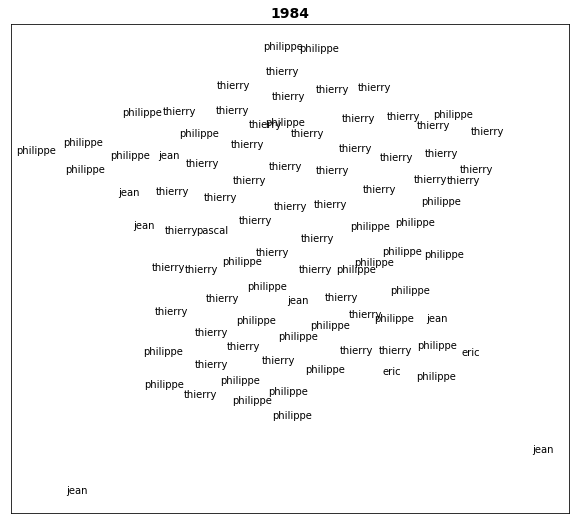

In [66]:
cdf=pd.merge(cdf,dep)
fig = plt.figure(figsize=(10,9))
ax  = fig.add_subplot(111)
ax.scatter(cdf.lat,cdf.long,color="white")
ax.set_title("1984",fontsize=14, fontweight='bold')
for i, txt in enumerate(cdf.name.values):
    ax.text(cdf.lat[i],cdf.long[i] ,txt, verticalalignment='center', horizontalalignment='center')

plt.tick_params(   
    which='both',    
    bottom=False,     
    top=False,        
    labelbottom=False,
    right=False,
    left=False,
    labelleft=False)

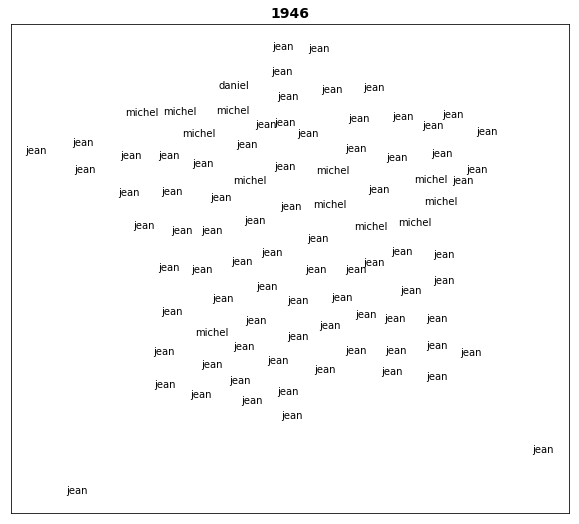

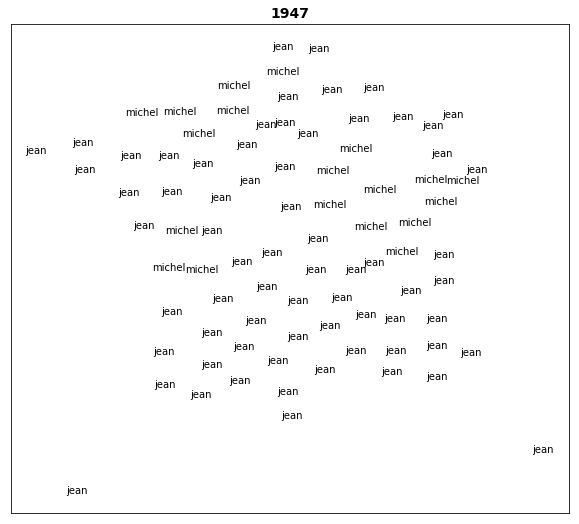

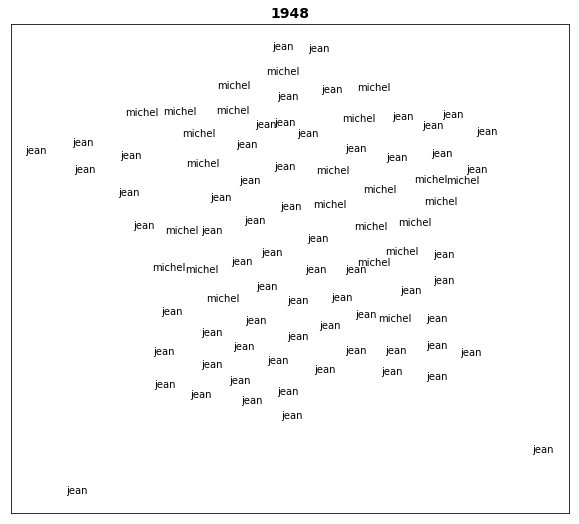

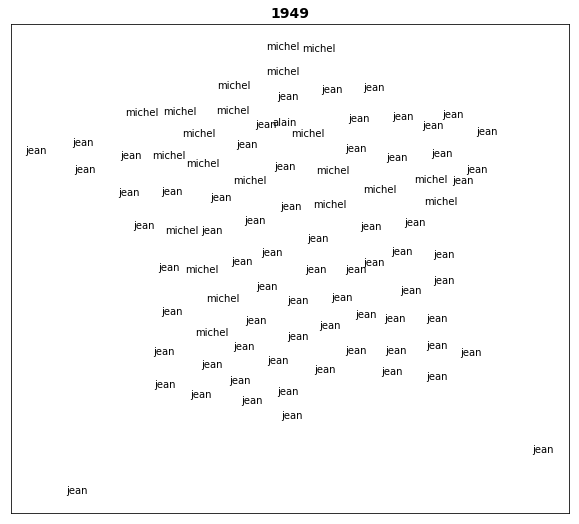

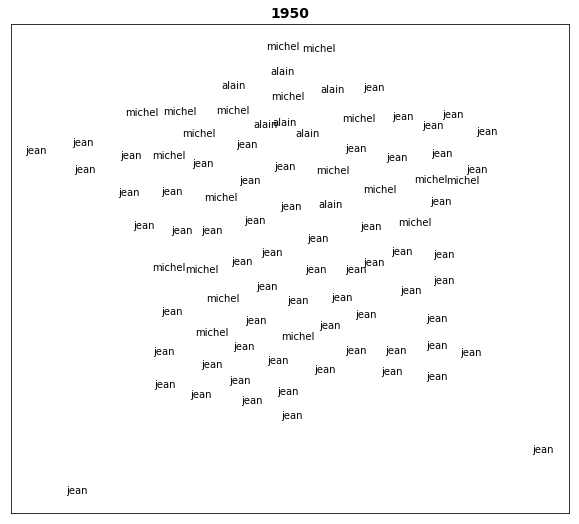

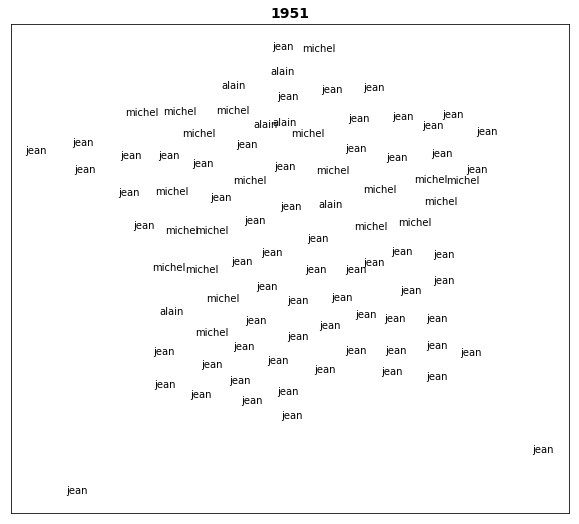

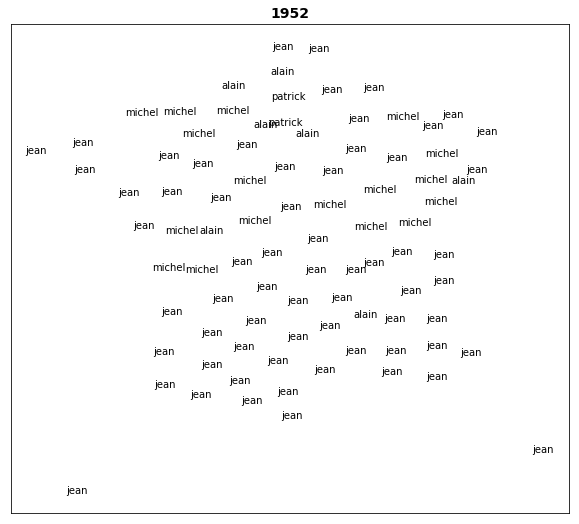

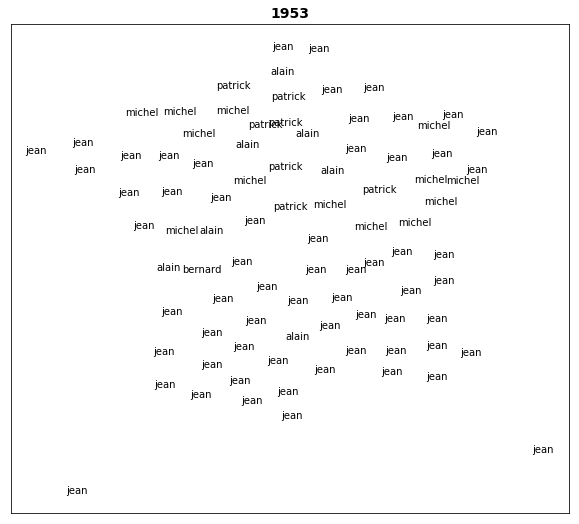

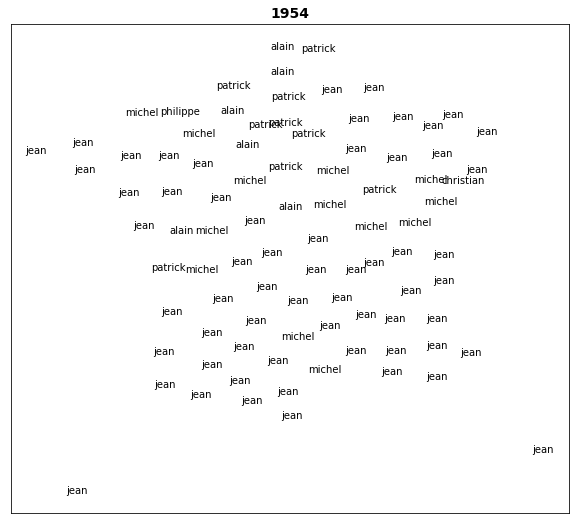

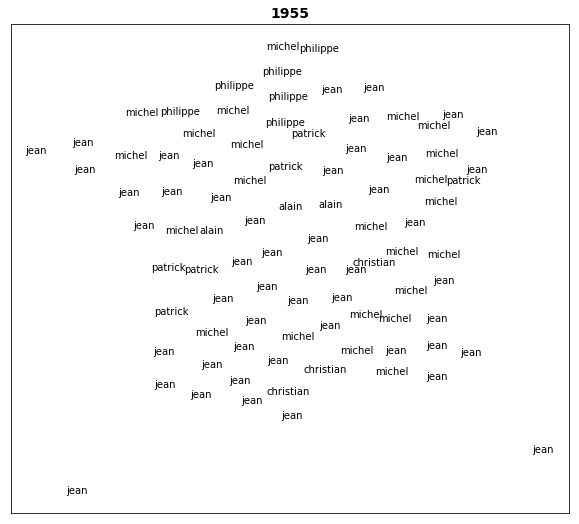

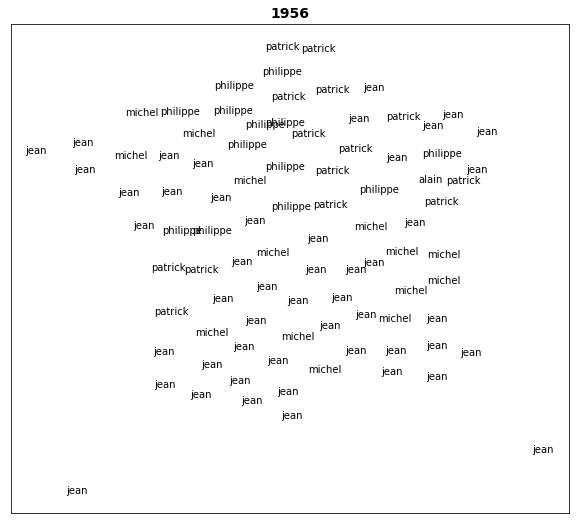

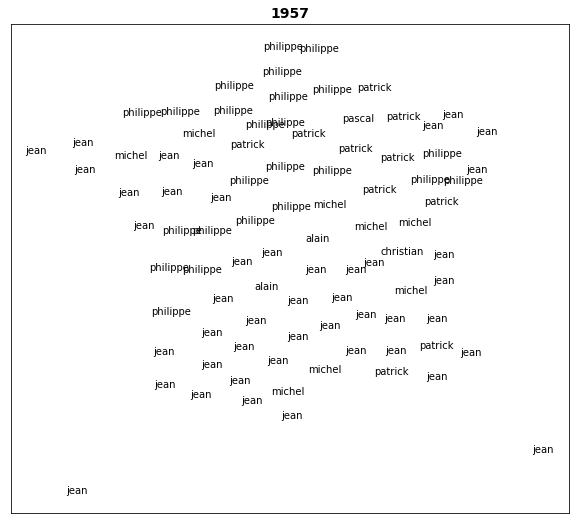

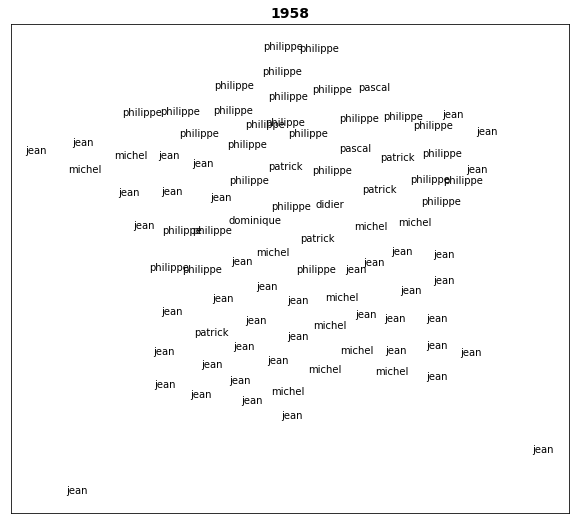

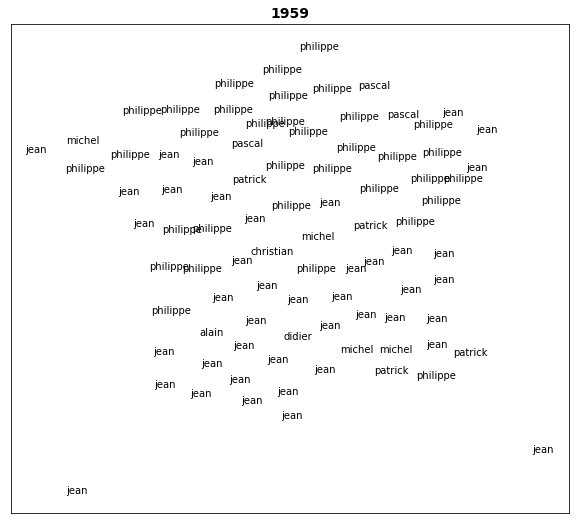

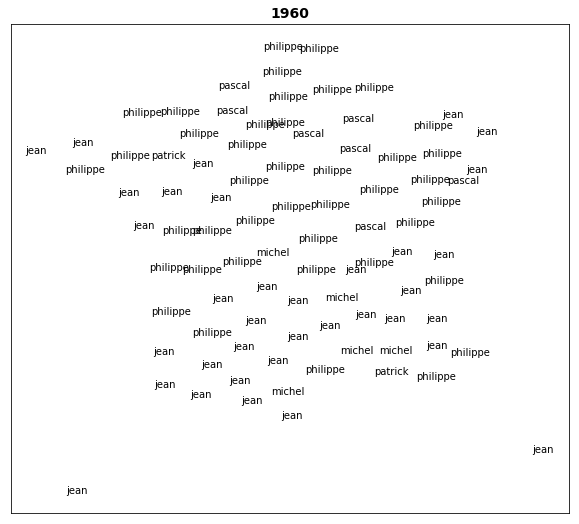

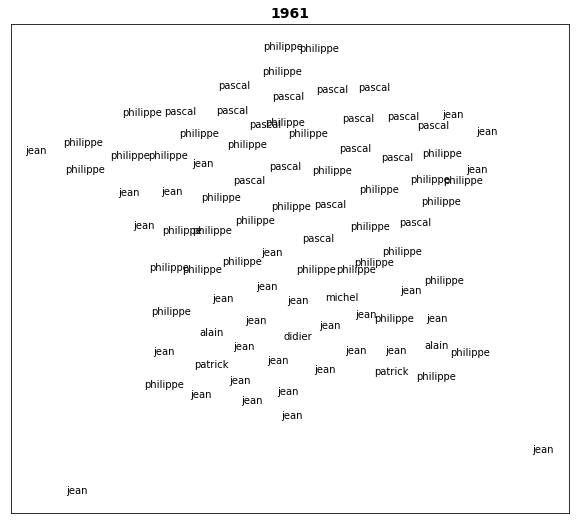

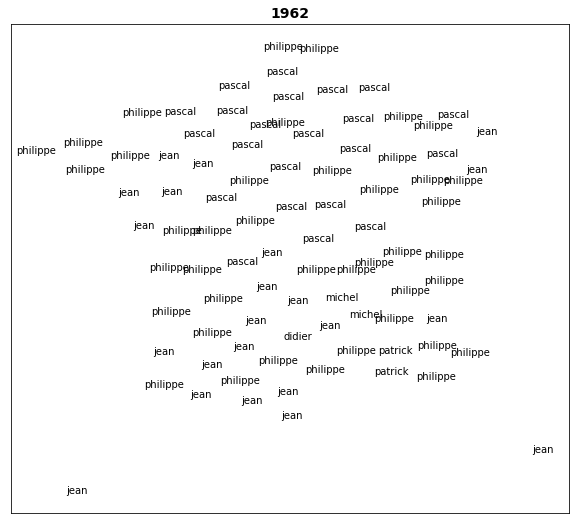

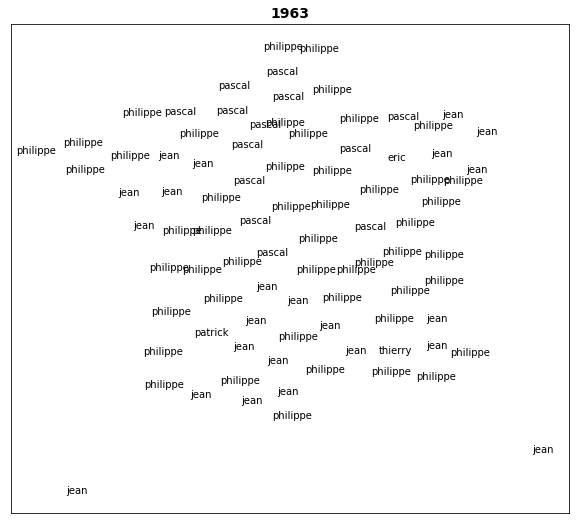

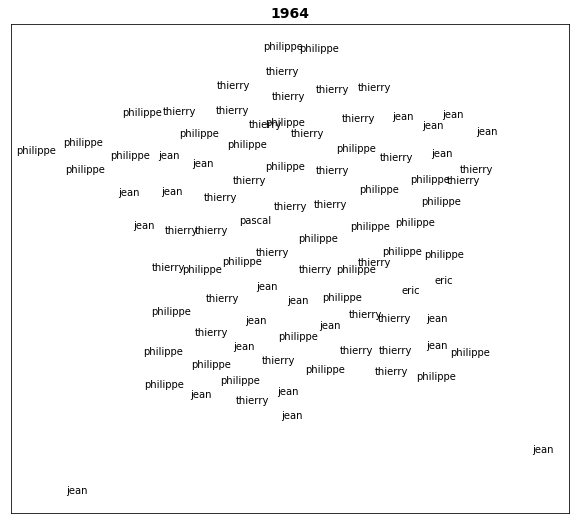

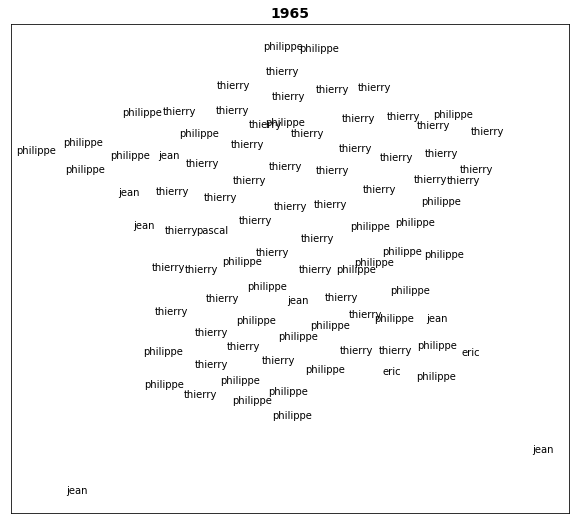

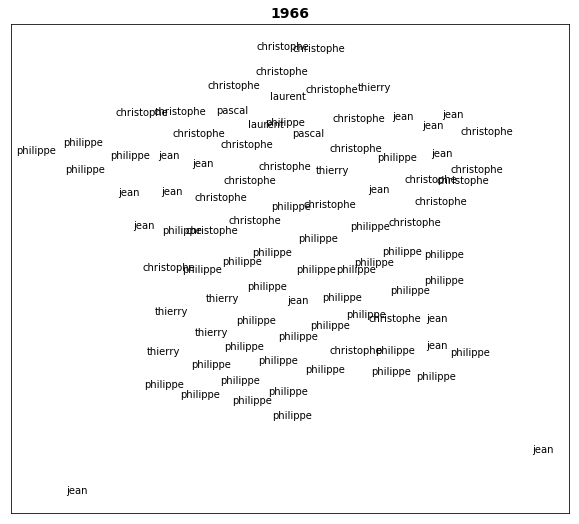

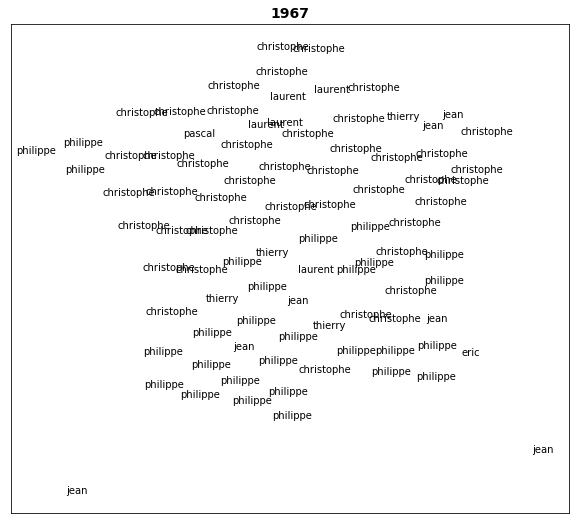

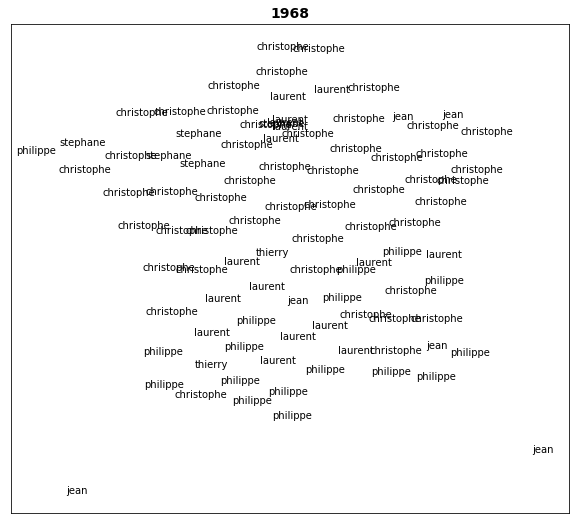

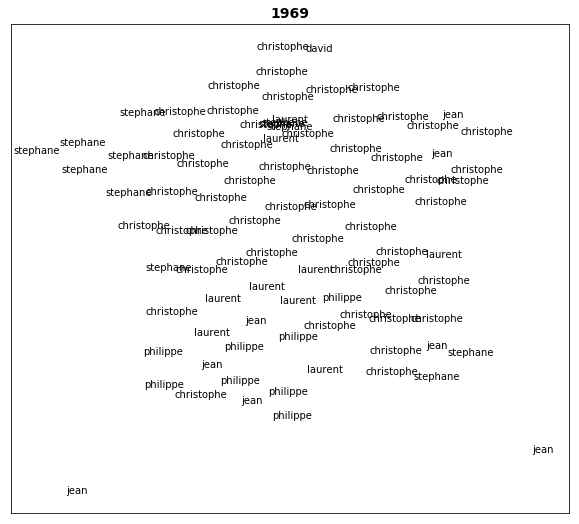

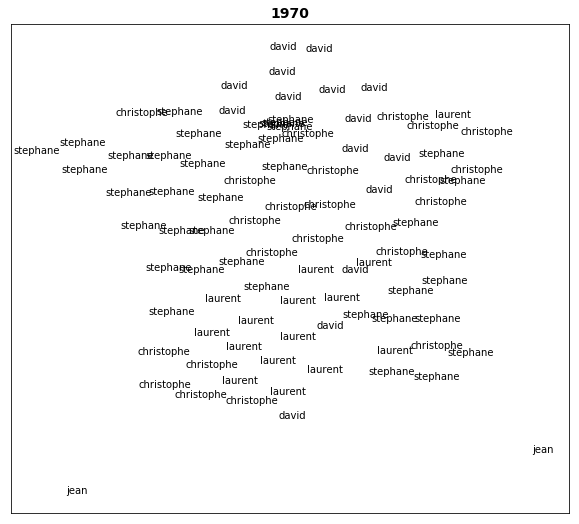

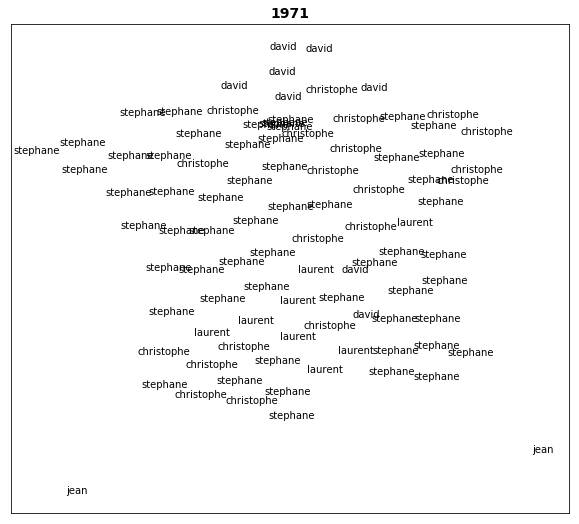

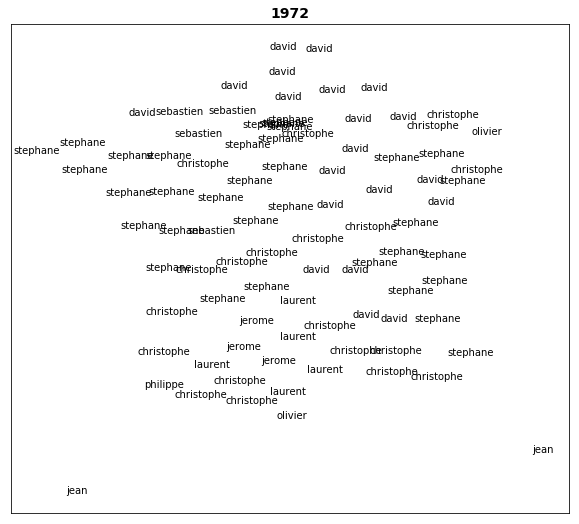

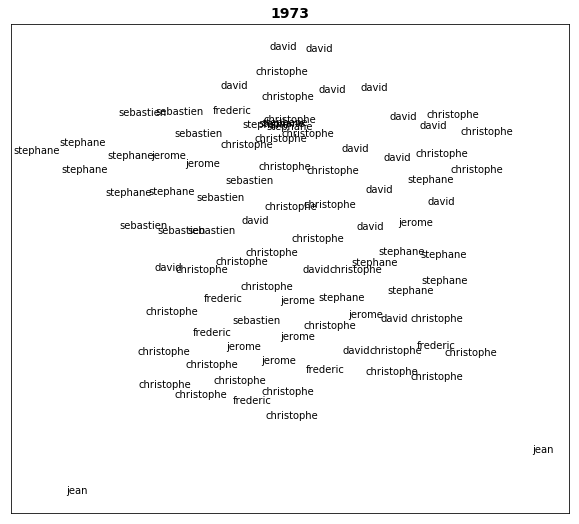

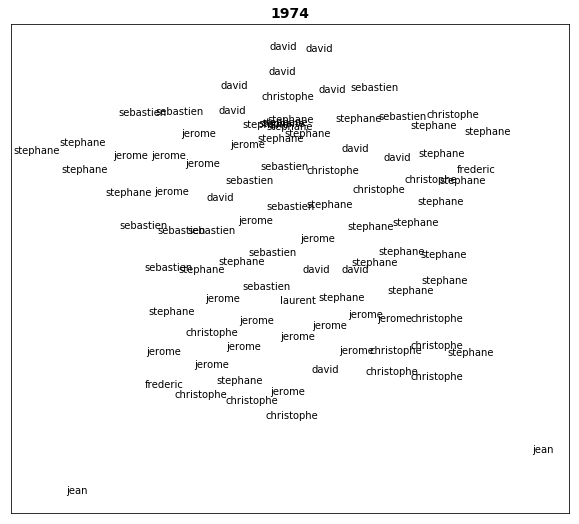

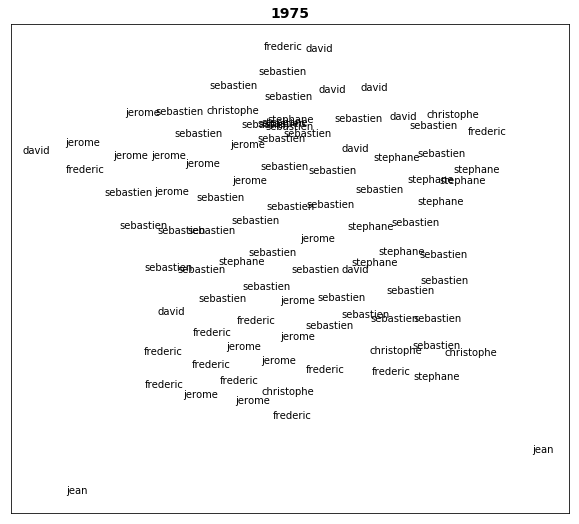

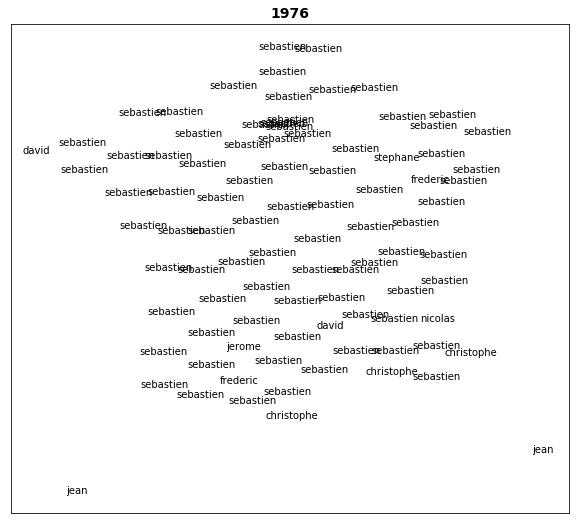

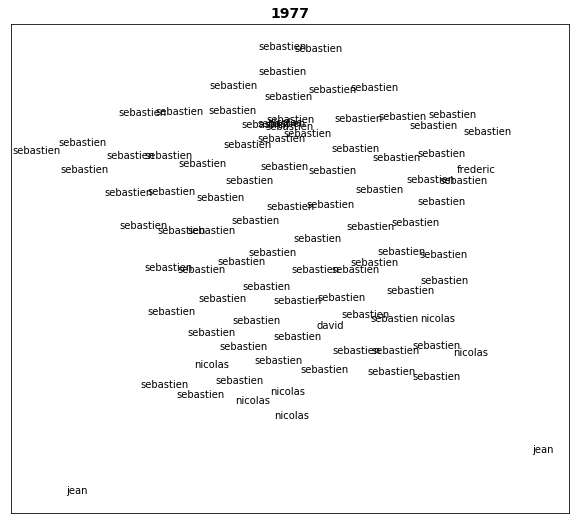

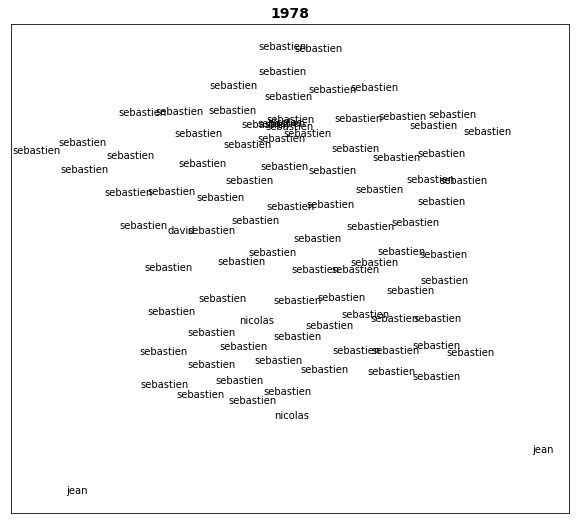

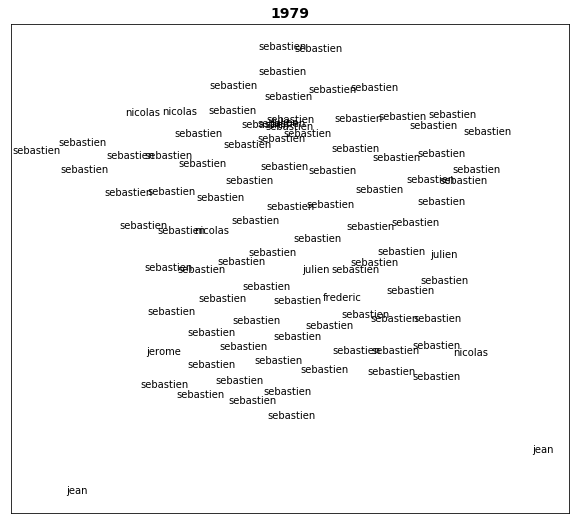

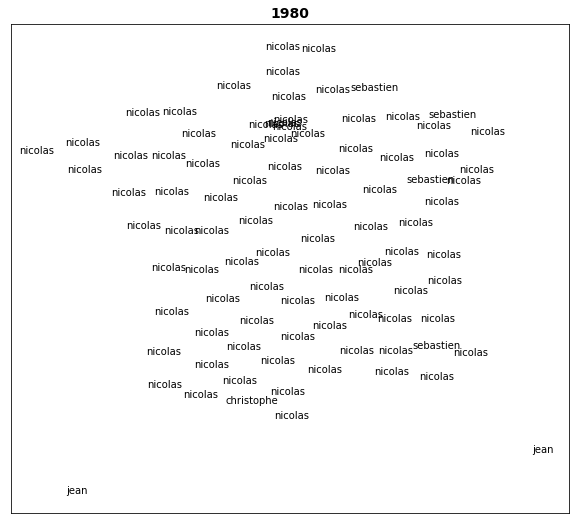

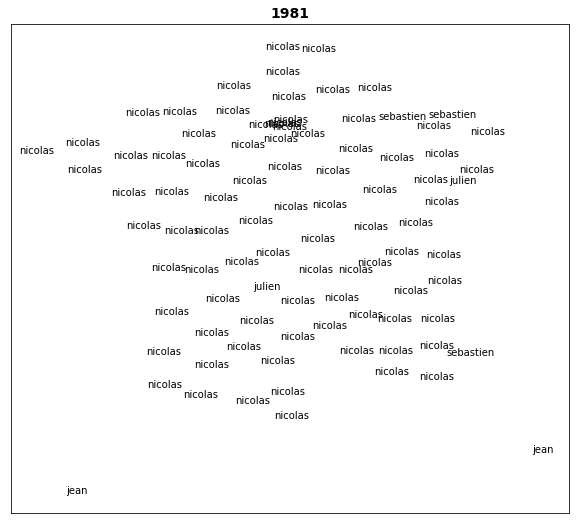

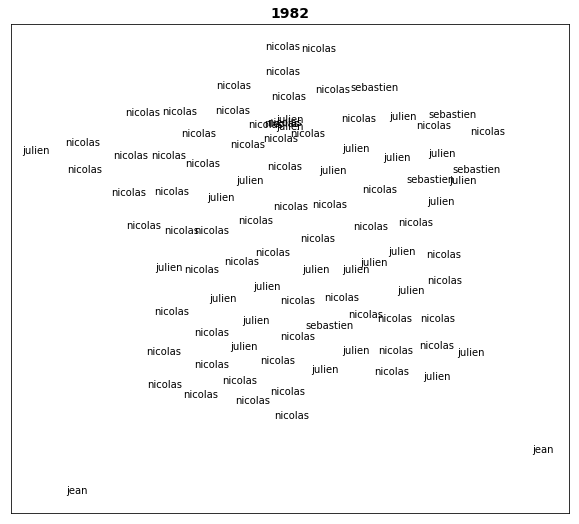

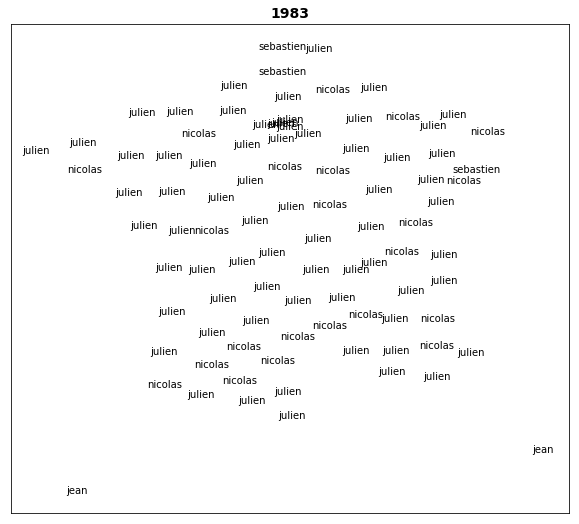

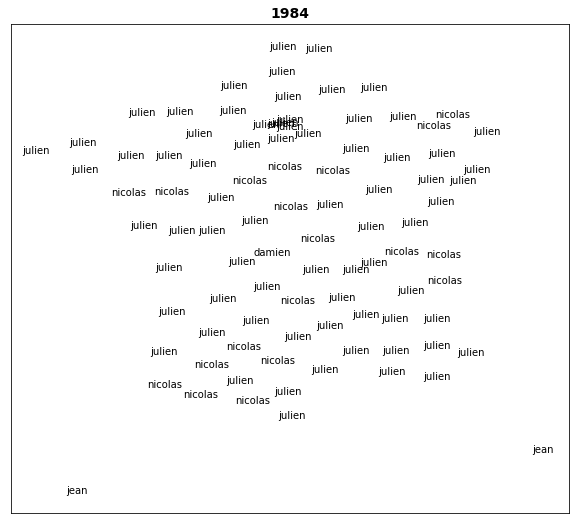

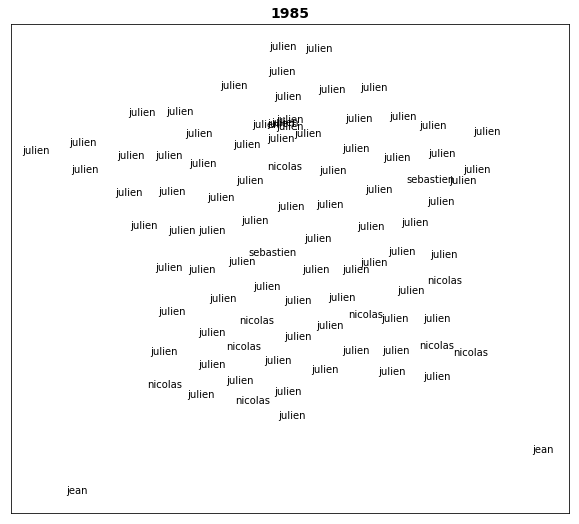

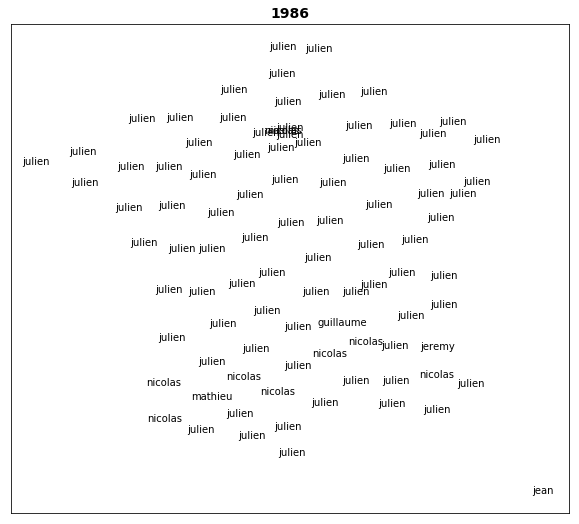

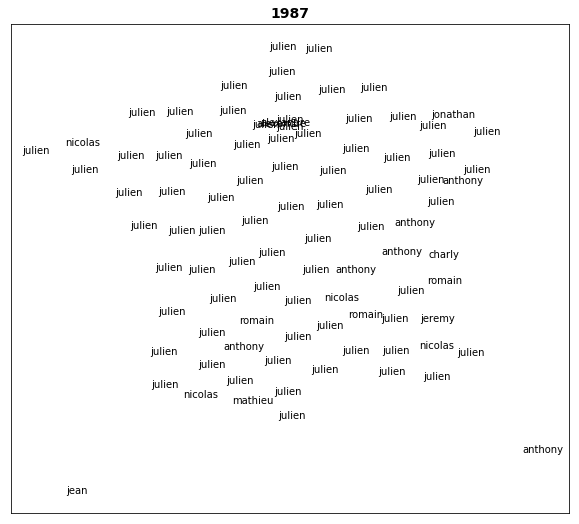

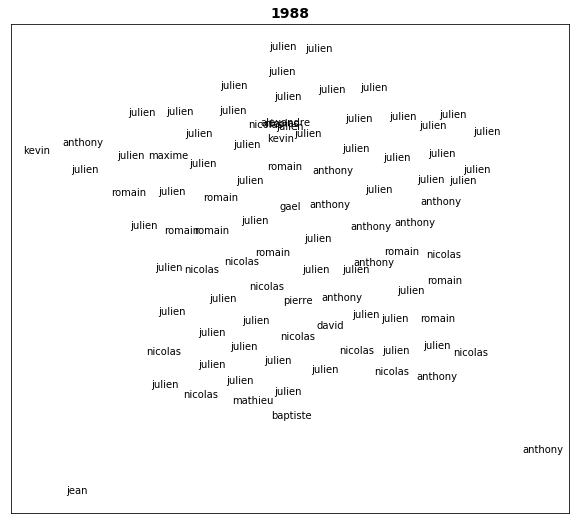

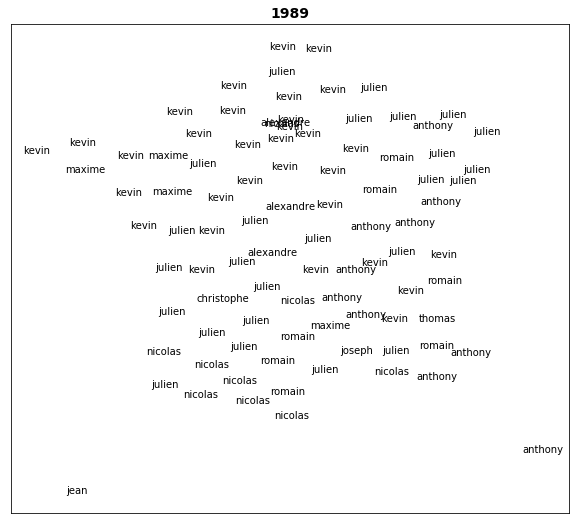

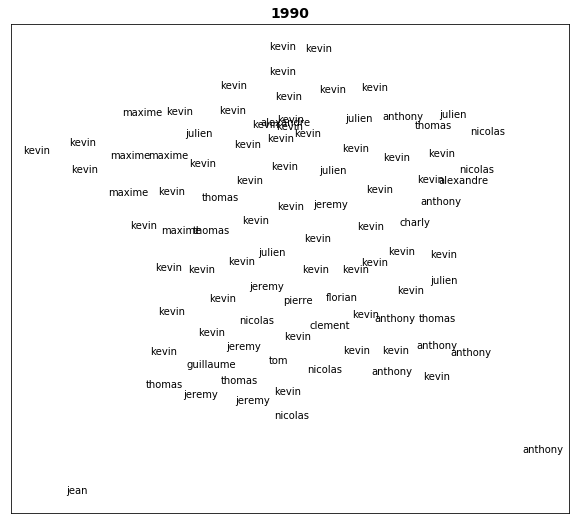

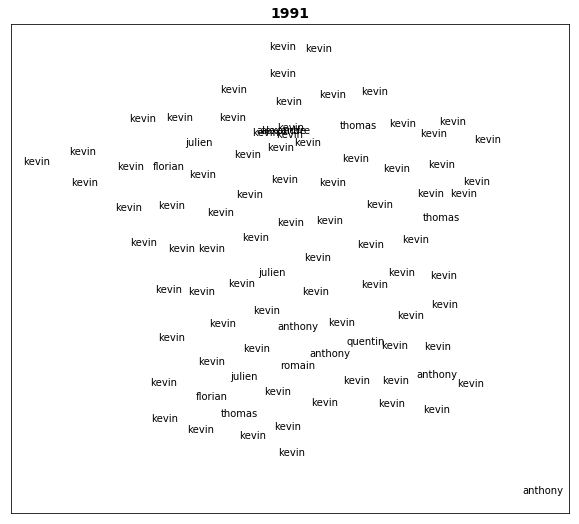

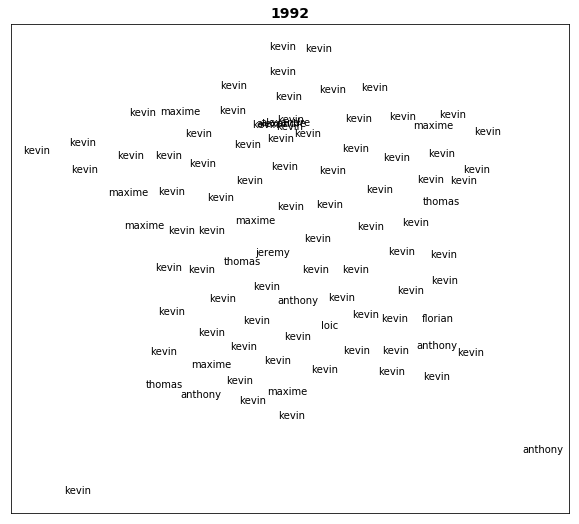

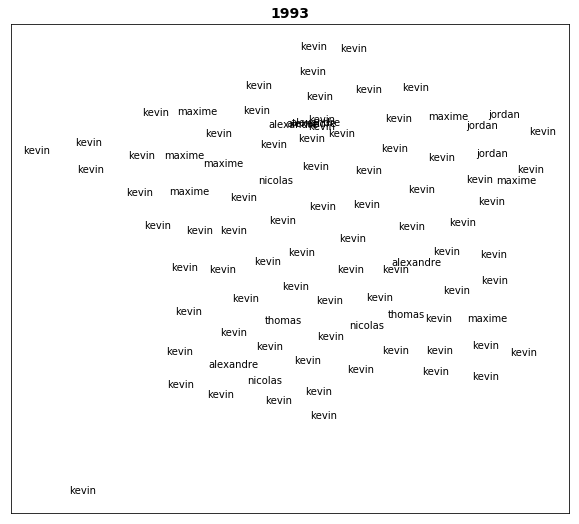

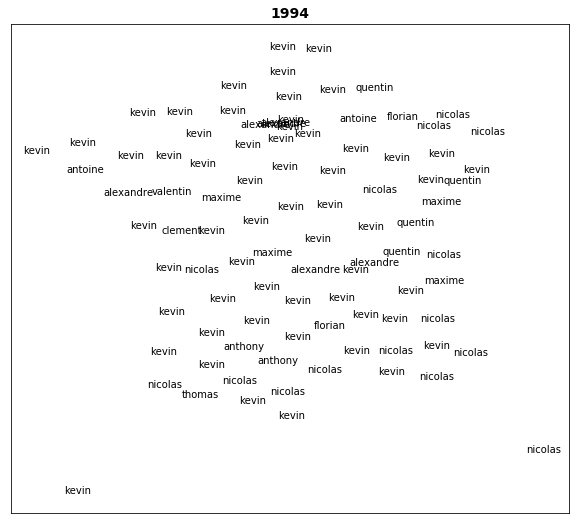

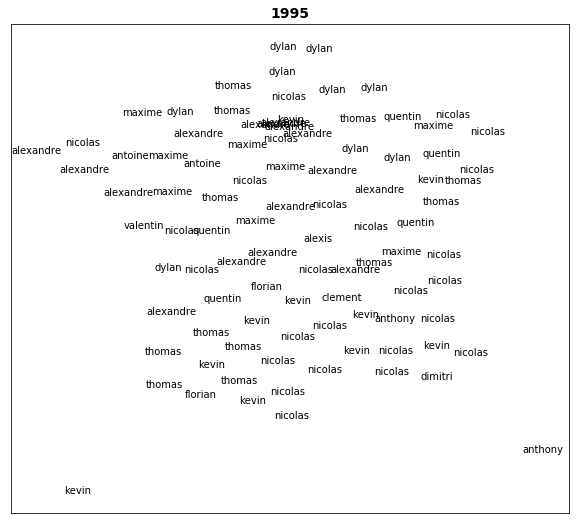

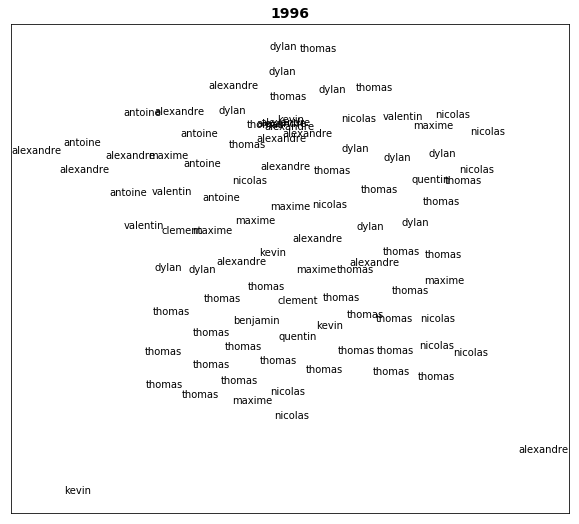

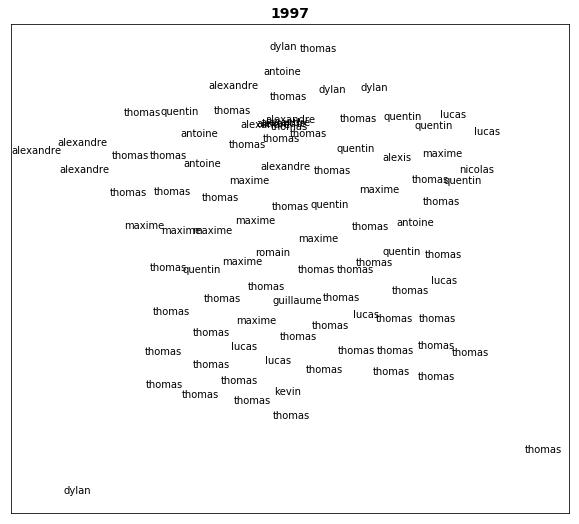

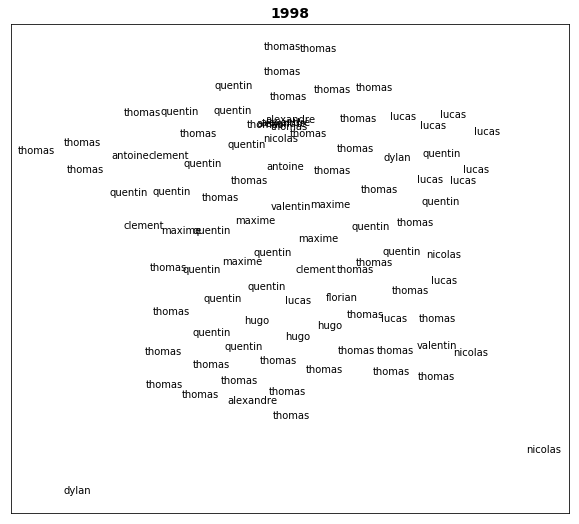

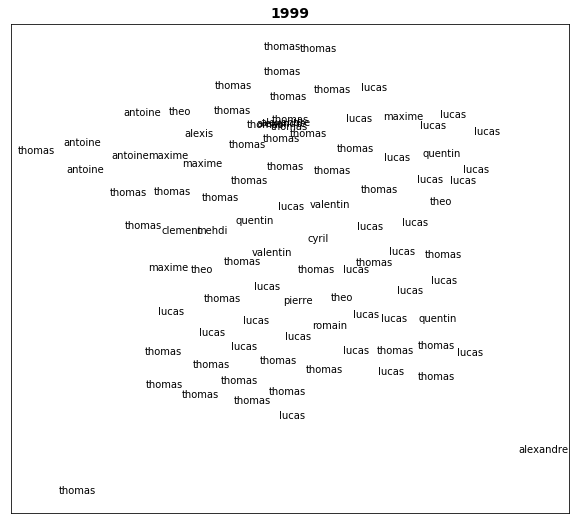

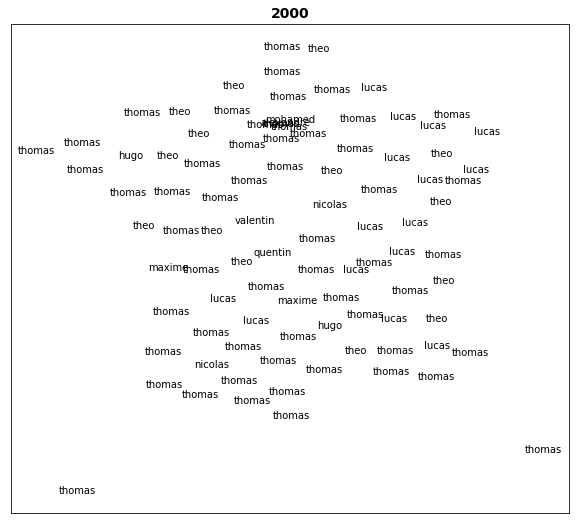

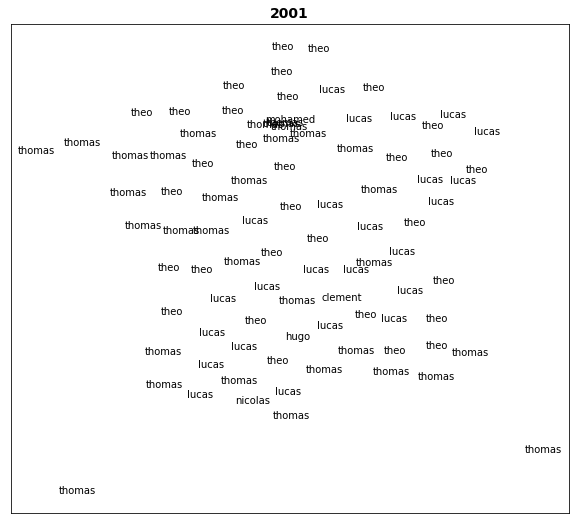

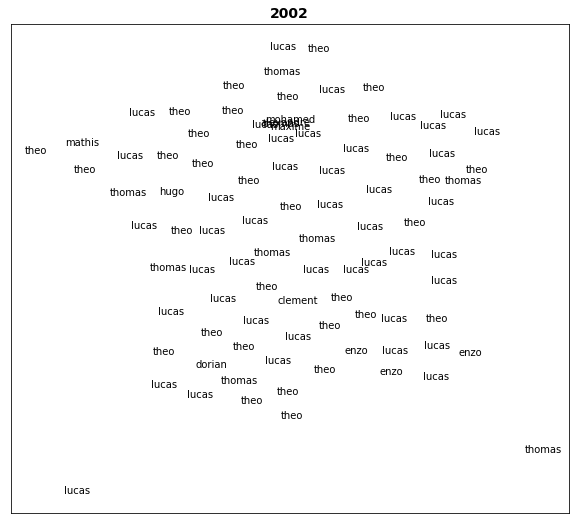

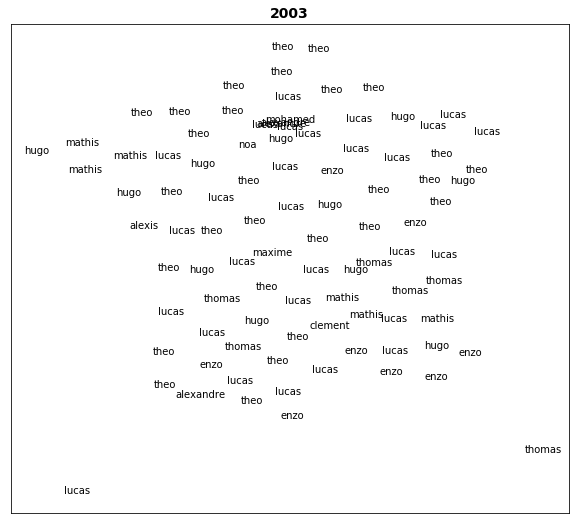

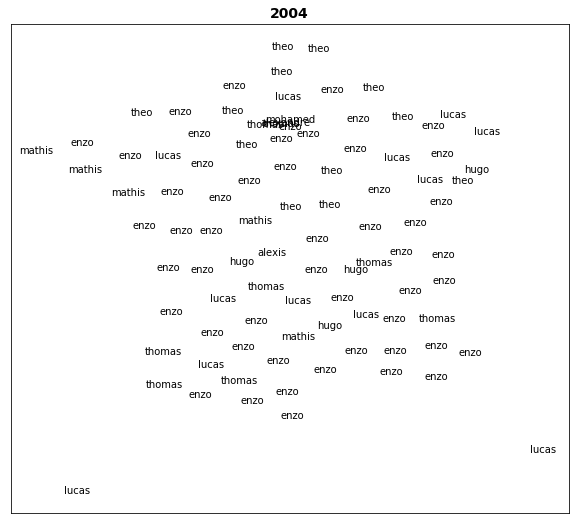

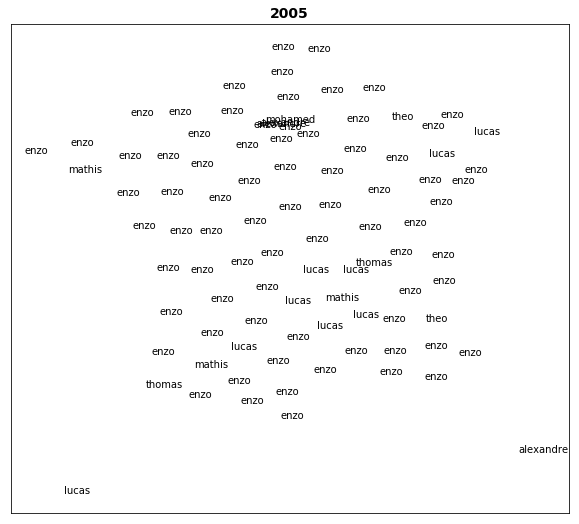

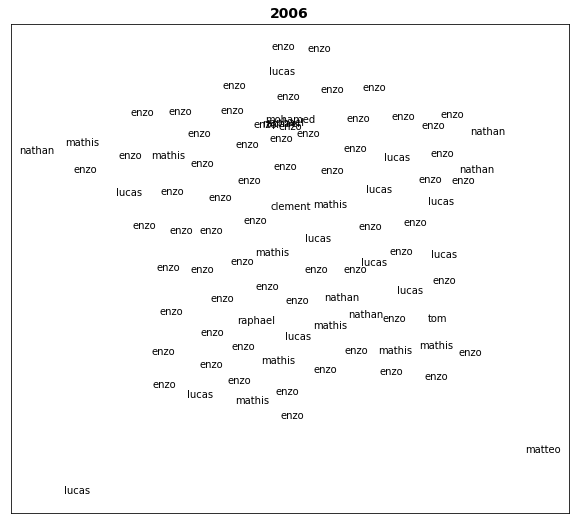

In [69]:
for y in prenoms1_annees_dep.index.levels[0]:
    cdf = prenoms1_annees_dep.loc[y].reset_index()
    cdf = pd.merge(cdf,dep)
    fig = plt.figure(figsize=(10,9))
    ax  = fig.add_subplot(111)
    ax.scatter(cdf.lat,cdf.long,color="white")
    ax.set_title("{}".format(y),fontsize=14, fontweight='bold')
    for i, txt in enumerate(cdf.name.values):
        ax.text(cdf.lat[i],cdf.long[i] ,txt,verticalalignment='center', horizontalalignment='center')

    plt.tick_params(   
        which='both',    
        bottom=False,     
        top=False,        
        labelbottom=False,
        right=False,
        left=False,
        labelleft=False)
    plt.savefig("./gifimages/{}_map.jpg".format(y))

In [ ]:
import os as os
os.system("convert -delay 50 ./gifimages/*.jpg prenoms.gif")


# Question 4 :

Faire la même carte pour les prénoms féminin